In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [4]:
df = pd.read_csv("USvideos.csv", parse_dates=["trending_date"])

C:\Users\HP\AppData\Local\Temp\ipykernel_2356\2474517695.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("USvideos.csv", parse_dates=["trending_date"])


In [5]:
df["trending_date"] = pd.to_datetime(df["trending_date"], format='%y.%d.%m')

In [6]:
top_video_id = df.groupby("video_id")["views"].max().sort_values(ascending=False).index[0]
video_df = df[df["video_id"] == top_video_id].sort_values("trending_date")

In [7]:
ts_df = video_df[["trending_date", "views"]].drop_duplicates(subset="trending_date")
ts_df.set_index("trending_date", inplace=True)

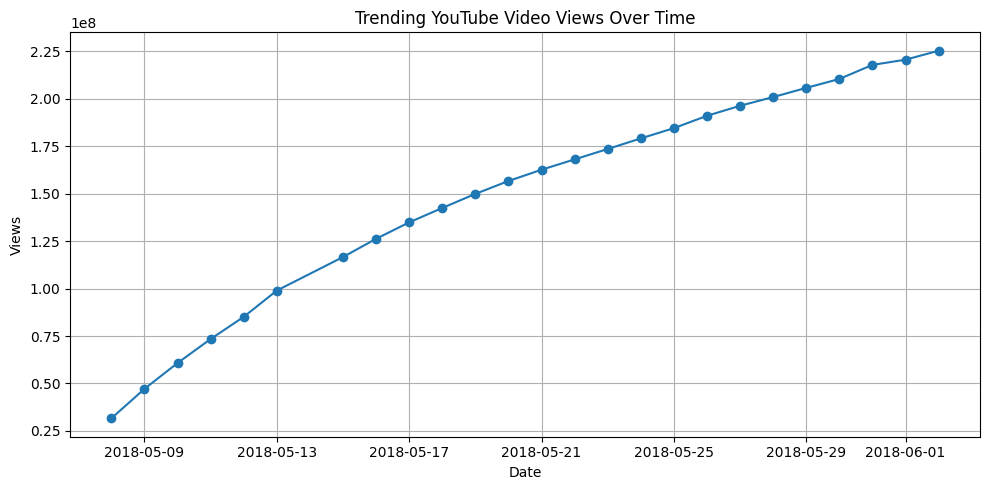

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(ts_df, marker='o', linestyle='-')
plt.title("Trending YouTube Video Views Over Time")
plt.xlabel("Date")
plt.ylabel("Views")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
train = ts_df[:-3]
test = ts_df[-3:]

In [10]:
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
forecast = model_fit.forecast(steps=3)
print("\n📊 Forecasted Views:")
print(forecast)


📊 Forecasted Views:
22    2.144248e+08
23    2.182311e+08
24    2.218091e+08
Name: predicted_mean, dtype: float64


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [12]:
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"\n✅ RMSE: {rmse:.2f}")


✅ RMSE: 3040938.48


In [13]:
print("\n🔤 Top Keywords in Video Titles + Tags:")


🔤 Top Keywords in Video Titles + Tags:


In [14]:
df["text"] = df["title"].fillna('') + " " + df["tags"].fillna('')

In [15]:
stop_words = stopwords.words('english')
vectorizer = CountVectorizer(stop_words=stop_words, max_features=10)
X = vectorizer.fit_transform(df["text"])

In [16]:
top_keywords = vectorizer.get_feature_names_out()
print(", ".join(top_keywords))

2018, funny, makeup, music, new, news, official, show, trailer, video
